# Statistical Decision Making
## Task 1

Consider the two-dimensional, discrete random variable $X = [X_1\ X_2]^\top$ subjected to the joint probability density $p_X$ as described in the following table.
<div style="text-align: center">$\begin{array}{c|cc} p_X(X_1, X_2)  & X_2 = 0 & X_2 = 1 \\ \hline\hline X_1 = 0 & 0.4 & 0.3 \\ X_1 = 1 & 0.2 & 0.1\end{array}$</div>

a) Compute the marginal probability densities $p_{X1}, p_{X2}$ and the conditional probability $P(X_2 = 0|X_1 = 0)$ as well as the expected value $\mathbb{E}[X]$ and the covariance matrix $\mathbb{E}[(X - \mathbb{E}[X])(X - \mathbb{E}[X])^\top]$ by hand.

In [1]:
import numpy as np

x = np.arange(1,10).reshape(3,3)
print(x.ravel())
print(x.ravel('F'))
print(x.ravel('F')//2)
x.flatten()

[1 2 3 4 5 6 7 8 9]
[1 4 7 2 5 8 3 6 9]
[0 2 3 1 2 4 1 3 4]


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
import numpy as np

# joint probability table
p_table = np.array([[0.4, 0.3], [0.2, 0.1]])

# each column of X contains a possible event. 1st row corresponds to x1,
# 2nd row corresponds to x2
#X = [[0 1 0 1],
#     [0 0 1 1]]
X = np.array([[0, 1, 0, 1], 
              [0, 0, 1, 1]])

# p_table.ravel('F') = [0.4  0.2  0.3  0.1] are the joint probability values that
# correspond to these columns

# marginal probabilities: sum accross rows
p_x1 = np.sum(p_table, axis=1)
p_x2 = np.sum(p_table, axis=0)

print('Marginal probability: [p(x1=0), p(x1=1)] = {}'.format(p_x1))
print('Marginal probability: [p(x2=0), p(x2=1)] = {}'.format(p_x2))

# conditional  p(x2 = 0 | x1 = 0)
# p(A|B) = p(A \intersect B) / p(B)
p_x2equals0condx1equals0 = p_table[0,0] / p_x1[0]
print('p(x2=0 | x1=0) = {}'.format(p_x2equals0condx1equals0))

# expected value
E_X = np.dot(X, p_table.ravel('F')) # ravel('F') while keeping column order
print('Expected value: {}'.format(E_X))

# covariance matrix
X_centered = X - np.expand_dims(E_X, axis=1) # expand_dims is needed so that numpy is able to subtract the vector from the matrix
print("X_centered:\n {}".format(X_centered))
CovX = np.dot(np.dot(X_centered, np.diag(p_table.ravel('F'))), X_centered.T)
print('Covariance matrix:\n {}'.format(CovX))


Marginal probability: [p(x1=0), p(x1=1)] = [0.7 0.3]
Marginal probability: [p(x2=0), p(x2=1)] = [0.6 0.4]
p(x2=0 | x1=0) = 0.5714285714285715
Expected value: [0.3 0.4]
X_centered:
 [[-0.3  0.7 -0.3  0.7]
 [-0.4 -0.4  0.6  0.6]]
Covariance matrix:
 [[ 0.21 -0.02]
 [-0.02  0.24]]


b) Write a PYTHON function `toyrnd` that expects the positive integer parameter `n` as its input and returns a matrix `X` of size `[2,n]`, containing `n` samples drawn independently from the distribution $p_X$, as its output.

In [2]:
def toyrnd(n):
    X_out = np.zeros((2,n))
    Q = np.zeros((n,))
    T = np.random.rand(n)
     
    # Interpreting [x1, x2] as binary number and Q as its decimal representation
    Q[T>0.4] = 1
    Q[T>0.7] = 2
    Q[T>0.9] = 3
    
    X_out[0] = Q // 2 # floor division
    X_out[1] = Q % 2 # modulus division
    
    return X_out

c) Verify your results in a) by generating `10000` samples with `toyrnd` and computing the respective empirical values.

In [5]:
N = 10000
X_observed = toyrnd(N)
# marginal probabilities
p_X1equals0_empirical = np.array(np.sum(X_observed[0,:]==0))/N
p_X1equals1_empirical = np.array(np.sum(X_observed[0,:]==1))/N
p_X2equals0_empirical = np.array(np.sum(X_observed[1,:]==0))/N
p_X2equals1_empirical = np.array(np.sum(X_observed[1,:]==1))/N

p_x1_empirical = np.array([p_X1equals0_empirical, p_X1equals1_empirical])
p_x2_empirical = np.array([p_X2equals0_empirical, p_X2equals1_empirical])

print('Empirical marginal probability: [p(x1=0), p(x1=1)] = {}'.format(p_x1_empirical))
print('Empirical marginal probability: [p(x2=0), p(x2=1)] = {}'.format(p_x2_empirical))

# conditional probability
X2condX1equals0 = X_observed[1, X_observed[0,:]==0]
P_X2equals0condX1eqzals0_empirical = np.array(np.sum(X2condX1equals0 == 0)) / len(X2condX1equals0)
print('Empirical conditional probability P(x2=0|x1=0):', P_X2equals0condX1eqzals0_empirical)
# expected value
E_X_empirical = np.sum(X_observed, axis=1)/N
print('Empirical expected value: {}'.format(E_X_empirical))

# covariance matrix
CovX_empirical = np.dot(X_observed - np.expand_dims(E_X_empirical, axis=1), (X_observed - np.expand_dims(E_X_empirical, axis=1)).T) / N
print('Empirical covariance matrix:\n {}'.format(CovX_empirical))

Empirical marginal probability: [p(x1=0), p(x1=1)] = [0.7028 0.2972]
Empirical marginal probability: [p(x2=0), p(x2=1)] = [0.603 0.397]
Empirical conditional probability P(x2=0|x1=0): 0.5762663631189527
Empirical expected value: [0.2972 0.397 ]
Empirical covariance matrix:
 [[ 0.20887216 -0.0187884 ]
 [-0.0187884   0.239391  ]]


## Task 2

The MNIST training set consists of handwritten digits from 0 to 9, stored as PNG files of size $28 \times 28$ and indexed by label. Download the provided ZIP file from Moodle and make yourself familiar with the directory structure.

a) Grayscale images are typically described as matrices of `uint8` values. For numerical calculations, it is more sensible to work with floating point numbers. Load two (abitrary) images from the database and convert them to matrices `I1` and `I2` of `float64` values in the interval $[0, 1]$.

In [11]:
import imageio.v2 as imageio

# define to image paths which to import
data_folder = './mnist_train/mnist/'

impath1 = data_folder + 'd2/d2_0075.png'
impath2 = data_folder + 'd3/d3_0013.png'

# import and convert to numpy array
I1 = np.array(imageio.imread(impath1)).astype(np.float64)
I2 = np.array(imageio.imread(impath2)).astype(np.float64)

# check values
print('First image min/max value: {}/{}'.format(np.min(I1), np.max(I1)))

# normalize values to [0,1]
I1 = I1 / 255.
I2 = I2 / 255.

First image min/max value: 0.0/255.0


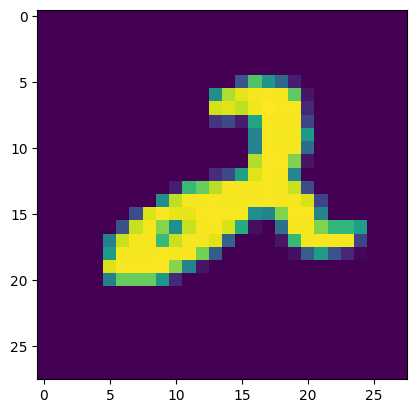

In [12]:
import matplotlib.pyplot as plt
plt.imshow(I1)

b) The matrix equivalent of the euclidean norm $\|\cdot\|_2$ is the Frobenius norm. For any matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$, it is defined as
			\begin{equation}
			    \|\mathbf{A}\|_F = \sqrt{\mathrm{tr}(\mathbf{A}^\top \mathbf{A})},
			\end{equation}
			where $\mathrm{tr}$ denotes the trace of a matrix. Compute the distance $\|\mathbf{I}_1 - \mathbf{I}_2\|_F$ between the images `I1` and `I2` by using three different procedures in PYTHON:			
-  Running the `numpy.linalg.norm` function with the `'fro'` parameter
-  Directly applying the above equation
-  Computing the euclidean norm between the vectorized images

In [13]:
# using frobenius nor
%timeit
frob1 = np.linalg.norm(I1 - I2, 'fro')

print('Numpy Frobenius norm: {}'.format(frob1))

# using formula
frob2 = np.sqrt(np.trace(np.matmul((I1 - I2), (I1 - I2).T)))

print('Implemented Frobenius norm: {}'.format(frob2))
# using euclidean norm of vectorized images
frob3 = np.sqrt(np.dot((I1 - I2).ravel(), (I1 - I2).ravel()))
print('Euclidean norm of vectorized images: {}'.format(frob3))

Numpy Frobenius norm: 11.71589679029833
Implemented Frobenius norm: 11.715896790298329
Euclidean norm of vectorized images: 11.71589679029833


c) In the following, we want to solve a simple classification problem by applying *$k$-Nearest Neighbours*. To this end, choose two digit classes, e.g. $0$ and $1$, and load `n_train = 500` images from each class to the workspace. Convert them according to subtask a) and store them in vectorized form in the matrix `X_train` of size `[784, 2*n_train]`. Provide an indicator vector `Y_train` of length `2*n_train` that assigns the respective digit class label to each column of `X_train`.

From each of the two classes, choose another set of `n_test=10` images and create the according matrices `X_test` and `Y_test`. Now, for each sample in the test set, determine the `k = 20` training samples with the smallest Frobenius distance to it and store their indices in the `2*n_test, k` matrix `NN`. Generate a vector `Y_kNN` containing the respective estimated class labels by performing a majority vote on `NN`. Compare the result with `Y_test`.

In [15]:
# chose which numbers to load:
d_id1 = 2
d_id2 = 3
d = [d_id1, d_id2]

# define # of training and testing samples
n_train = 500
n_test = 10
k = 20

# initialize data matrices
X_train = np.zeros((784, 2*n_train))
X_test = np.zeros((784, 2*n_test))

print('Loading training data...')
for j in range(0,n_train):
    impath = data_folder + 'd' + str(d[0]) + '/d' + str(d[0]) + '_' + str(j+1).zfill(4) + '.png'
    X_train[:,0*n_train+j] = np.array(imageio.imread(impath)).astype(float).ravel()/255
    impath = data_folder + 'd' + str(d[1]) + '/d' + str(d[1]) + '_' + str(j+1).zfill(4) + '.png'
    X_train[:,1*n_train+j] = np.array(imageio.imread(impath)).astype(float).ravel()/255
        
Y_train = np.concatenate((np.zeros(n_train), np.ones(n_train)))


print('Loading test data...')
for j in range(n_test):
    impath = data_folder + 'd' + str(d[0]) + '/d' + str(d[0]) + '_' + str(n_train+j+1).zfill(4) + '.png'
    X_test[:,0*n_test+j] = np.array(imageio.imread(impath)).astype(float).ravel()/255
    impath = data_folder + 'd' + str(d[1]) + '/d' + str(d[1]) + '_' + str(n_train+j+1).zfill(4) + '.png'
    X_test[:,1*n_test+j] = np.array(imageio.imread(impath)).astype(float).ravel()/255
    
Y_test = np.concatenate((np.zeros(n_test), np.ones(n_test)))

print('Computing Frobenius distances...')

D = np.zeros((2*n_test, 2*n_train))
for i in range(2*n_test):
    # compute norm of distance of test sample i to all training samples
    D[i,:] = np.sqrt(np.sum((np.expand_dims(X_test[:,i], axis=1) - X_train) ** 2, axis=0))
    
print('Determining nearest neighbors...')
# np.argsort outputs indices required for sorting
NN = np.argsort(D, axis = 1)
# we only need the k closest neighbors, hence, we cut off after k columns
NN = NN[:,0:k]

print('Ground truth label data:')
print(Y_test.astype(float))

# compute nearest neighbor labelling
# sum over labels of k nearest training examples
# and divide by k
# if the resulting number is smaller than 0.5, we assign label 0
# if the resulting number is greater, we assign label 1
kNN_mask = np.sum(Y_train[NN], axis=1)/k >= 0.5
# convert boolean to integer
Y_kNN= kNN_mask.astype(float)

print('Labels determined by kNN:')
print(Y_kNN)

Loading training data...
Loading test data...
Computing Frobenius distances...
Determining nearest neighbors...
Ground truth label data:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Labels determined by kNN:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
